In [155]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

In [156]:
# initializing path
data_dir = Path('ct-kidney-dataset')
train_dir = data_dir

In [157]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [158]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')

In [159]:
# An empty list for inserting data into this list in (image_path, Label) format
train_data = []

In [160]:
# Function to process images
def process_images(case, label):
    for img in case:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (28, 28))
        if img.shape[2] == 1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.array(img)
        img = img / 255.0  # Normalization
        train_data.append(img)
        train_labels.append(label)

In [161]:
# Labeling the Cyst case as 0
for img in Cyst_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Stone_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Tumor_Cases:
    train_data.append((img, 3))

In [162]:
# Making a data frame using pandas (creating CSV file)
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

In [163]:
# Select random data row from the dataframe and show and index it.
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

,image,label
0,ct-kidney-dataset/Cyst/Cyst- (88).jpg,0
1,ct-kidney-dataset/Normal/Normal- (47).jpg,1
2,ct-kidney-dataset/Cyst/Cyst- (68).jpg,0
3,ct-kidney-dataset/Tumor/Tumor- (16).jpg,3
4,ct-kidney-dataset/Cyst/Cyst- (2).jpg,0


In [164]:
# Returns all the unique values of Label in train_data
train_data['label'].unique()

array([0, 1, 3, 2])

In [165]:
# Returns number of rows and columns
train_data.shape

(260, 2)

In [166]:
# Getting the count of each class (Normal, Cyst, Tumor, Stone)
cases_count = train_data['label'].value_counts()
cases_count

label
3    70
2    70
0    60
1    60
Name: count, dtype: int64

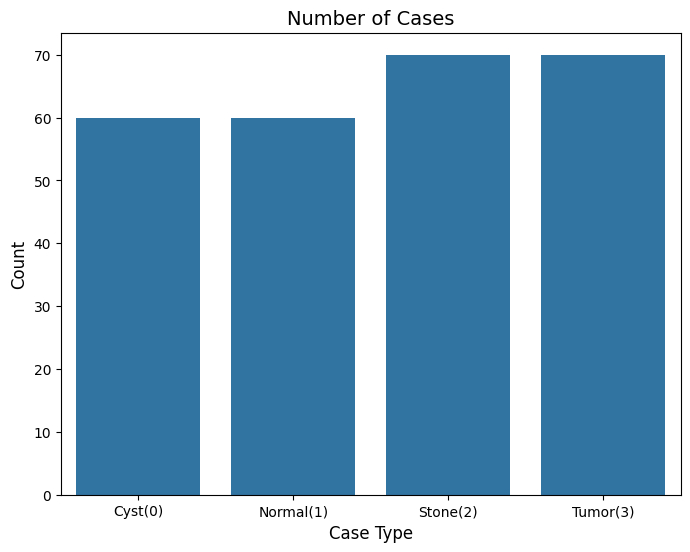

In [167]:
# Plotting the Graph 
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
#plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])

# Check if the length of cases_count.index matches the number of labels
expected_labels = ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)']
if len(cases_count.index) == len(expected_labels):
    plt.xticks(range(len(cases_count.index)), expected_labels)
else:
    print("Mismatch in number of ticks and labels")


plt.show()

In [168]:
# Getting few samples for both the classes

# Gets 5 data from each cases
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples

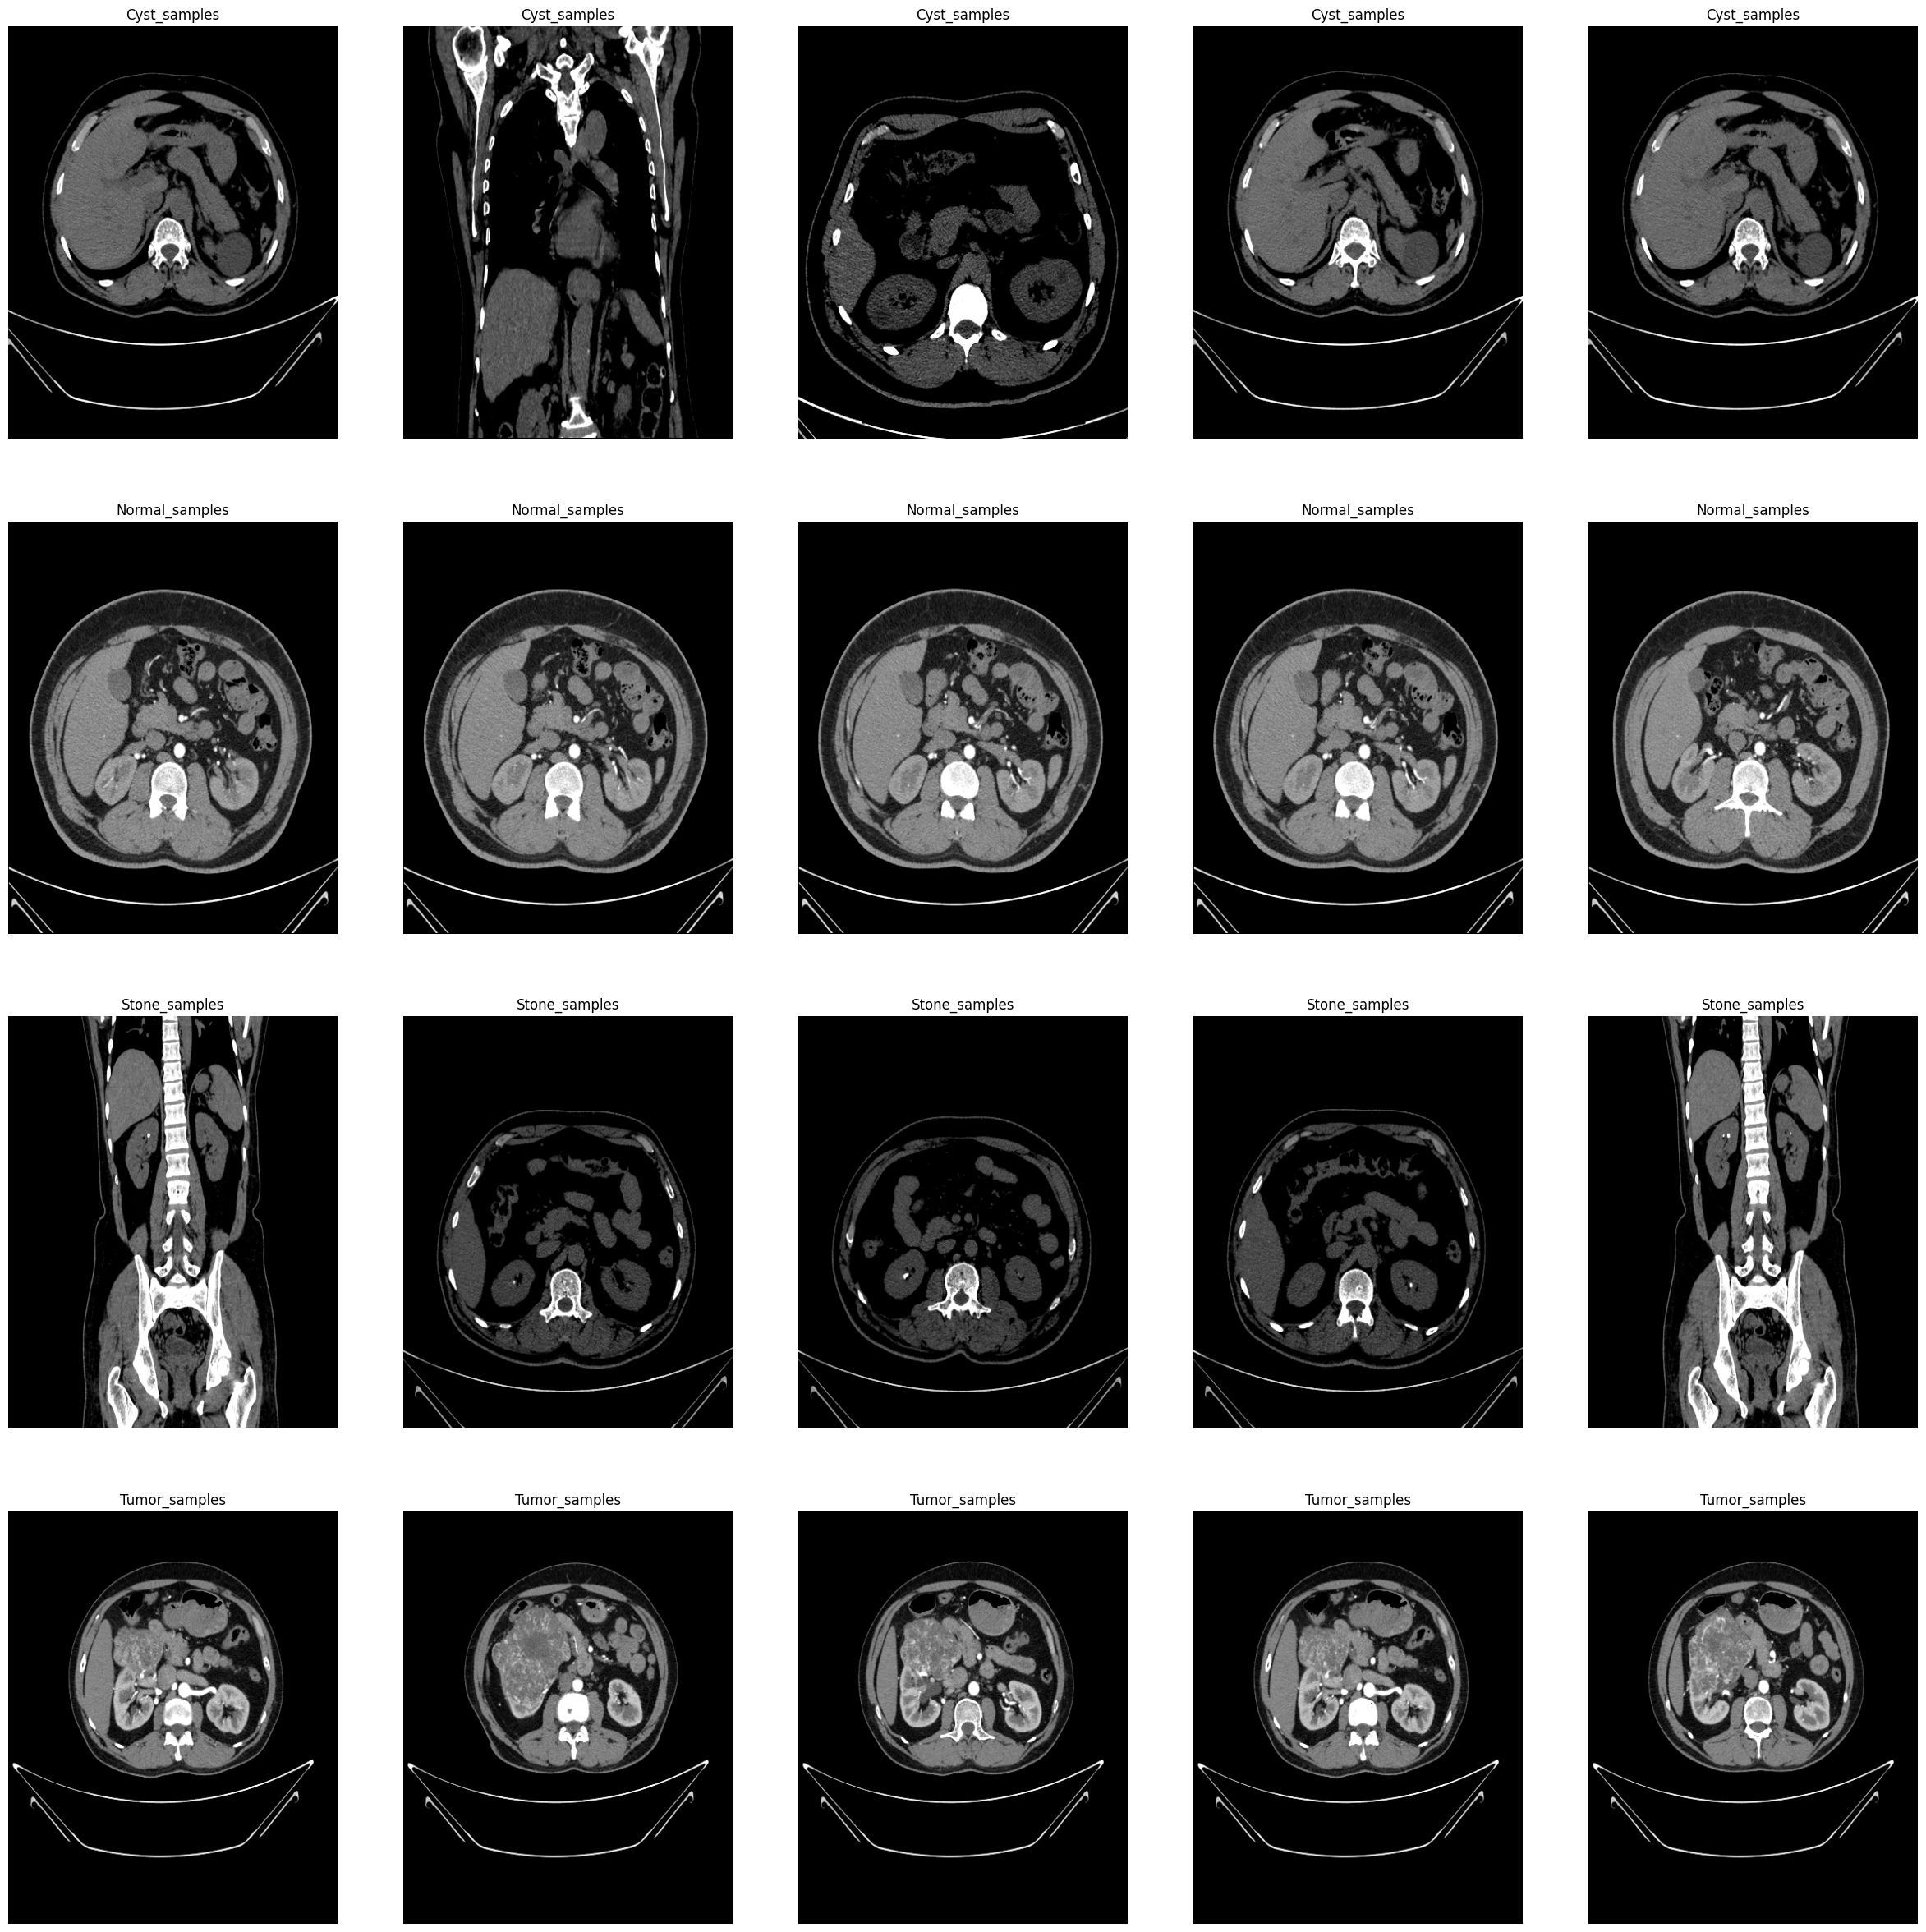

In [169]:
import matplotlib.pyplot as plt
from matplotlib.image import imread


num_samples = len(samples)
num_images_to_display = min(20, num_samples)

# Displaying the picture
f, ax = plt.subplots(4, 5,figsize=(30,30)) # Initilizing the graph where image is to be display

for i in range(20):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image
    
    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
    
# Optionally hide any unused subplots if there are less than 20 images
for i in range(num_images_to_display, 20):
    ax[i // 5, i % 5].axis('off')
    

plt.show()

In [170]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [171]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

In [172]:
for img in Cyst_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image 
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cyst' 
    train_data.append(img)
    train_labels.append(label)

In [173]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [174]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [175]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [176]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (260, 28, 28, 3)
Total number of Labels :  (260,)


In [177]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.81960784, 0.81960784, 0.81960784],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [178]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst
...,...
255,Tumor
256,Tumor
257,Tumor
258,Tumor


In [179]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [180]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [181]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
255,3
256,3
257,3
258,3


In [182]:
print(train_data1.shape)
print(train_labels1.shape)

(260, 28, 28, 3)
(260, 1)


In [183]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

label    0
dtype: int64

In [184]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smote.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

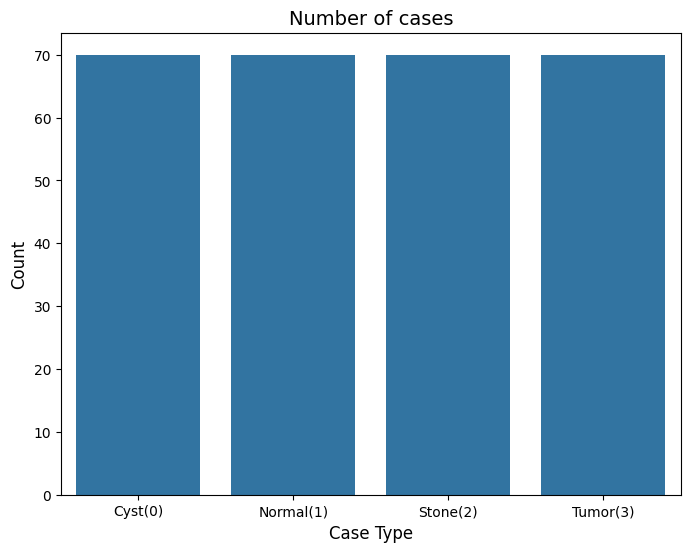

In [185]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [186]:
train_data2.shape

(280, 2352)

In [187]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape

(280, 28, 28, 3)

In [188]:
train_data

[array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.62745098, 0.62745098, 0.62745098],
         [0.        , 0.        , 0.     

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size = 0.20,random_state = 42) # With random_state=42, we get the same train and test sets across different executions
X_train, X_val, y_train, y_val = train_test_split(train_data2, train_labels2, test_size = 0.10,random_state = 42)

In [190]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (252, 28, 28, 3)
Testing Data X :  (56, 28, 28, 3)
Training Data y :  (252, 1)
Testing Data y :  (56, 1)
Validating Data X :  (28, 28, 28, 3)
Validating Data y (28, 1)
Image Size :  (28, 28, 3)


# DATA AUGMENTION 


In [191]:
import tensorflow as tf
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30, 
                    horizontal_flip=True)

In [192]:
# Making Model

from tensorflow.keras import layers,models

model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()

/home/mdsme/Documents/MiRA/MachineLearning/v1/kidney/klasifikasi-ginjal-master/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 28)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         6,404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,380 (91.33 KB)

 Trainable params: 23,380 (91.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2598 - loss: 1.3429 - val_accuracy: 0.8214 - val_loss: 1.1140
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8214 - loss: 1.0742 - val_accuracy: 0.9286 - val_loss: 0.7821
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9444 - loss: 0.6978 - val_accuracy: 0.9643 - val_loss: 0.3880


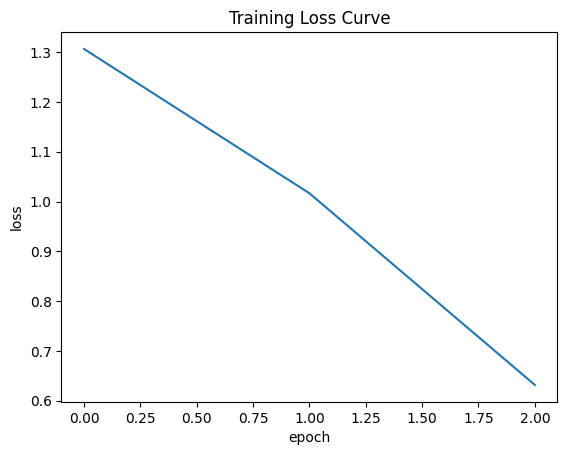

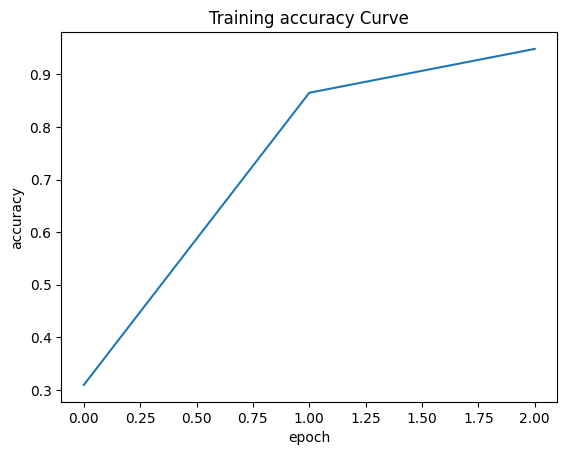

In [193]:
# Traning Model

#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Fit
history = model.fit(np.array(X_train), np.array(y_train), epochs=3, validation_data=(np.array(X_val), np.array(y_val)))

# Graph for Loss 
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

# Graph for Accuracy 
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [194]:
#Predicting Values

a = model.predict(X_test)
print(a)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.5192434  0.1994014  0.10374676 0.17760848]
 [0.08596881 0.7609215  0.13128166 0.02182797]
 [0.08818218 0.0624095  0.03093032 0.81847805]
 [0.05278766 0.04888804 0.03474966 0.8635746 ]
 [0.30805013 0.16468623 0.48429775 0.0429658 ]
 [0.4594122  0.12953621 0.39339793 0.01765361]
 [0.13167925 0.05835332 0.76853776 0.04142967]
 [0.09035578 0.0677512  0.03131626 0.81057686]
 [0.264834   0.16183405 0.5408613  0.03247068]
 [0.13953736 0.22359829 0.5942488  0.04261569]
 [0.05879416 0.04906824 0.03189816 0.8602393 ]
 [0.08293901 0.7687901  0.12813425 0.02013666]
 [0.0487816  0.04978834 0.02921091 0.8722192 ]
 [0.09418996 0.06455438 0.0323986  0.8088571 ]
 [0.49581668 0.22700648 0.11996799 0.15720892]
 [0.08456503 0.07033508 0.03083166 0.8142683 ]
 [0.10275535 0.7385849  0.14045927 0.01820054]
 [0.07493497 0.80292803 0.09793728 0.02419971]
 [0.07912768 0.79765326 0.10242063 0.02079832]
 [0.20244592 0.09120852 0.62353706 0.0828085 ]
 [0.4852325  0.221367 

In [195]:
# Sparse to Dense
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[0, 1, 3, 3, 2, 0, 2, 3, 2, 2, 3, 1, 3, 3, 0, 3, 1, 1, 1, 2, 0, 0, 3, 3, 2, 1, 1, 1, 3, 1, 0, 1, 1, 3, 2, 0, 0, 0, 2, 2, 1, 0, 3, 2, 3, 3, 2, 0, 3, 1, 1, 0, 0, 1, 2, 0]


In [196]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  0.9821428571428571


Confusion Matrix : 

 [[14  0  1  0]
 [ 0 15  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]


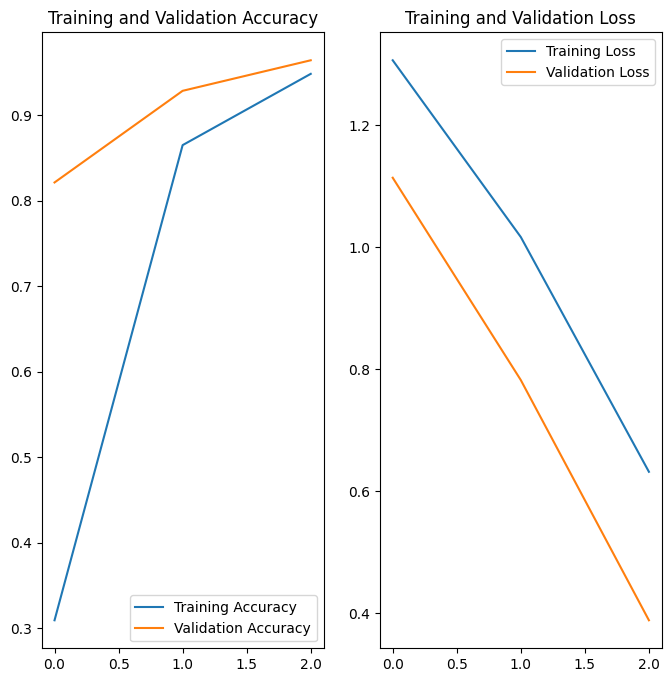

In [197]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[Text(0, 0.5, 'Cyst'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

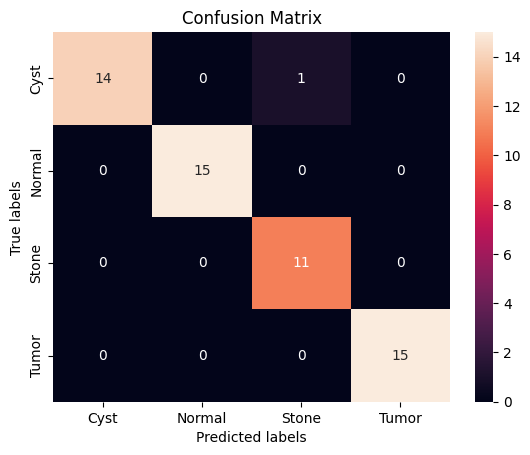

In [198]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor']) 
ax.yaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])

In [199]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))

F1 Score is : 0.9821428571428571


In [200]:
pic = []
image='ct-kidney-dataset/Stone/Stone- (904).jpg'
img = cv2.imread(str(image))

In [201]:
img = cv2.resize(img, (28,28))
pic.append(img)
pic1 = np.array(pic)

In [202]:
a = model.predict(pic1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [203]:
if a.argmax() == 0 :
    print("The detected disease is \"Cyst\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Stone\"")
else:
    print("The detected disease is \"Tumor\"")

The detected disease is "Stone"


In [204]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, InputLayer


#model = Sequential([
#    InputLayer(input_shape=(28, 28, 3)),
#    Dense(128, activation='relu'),
#    Dense(4, activation='softmax')
#])

#model.save('model.h5')


In [205]:
from tensorflow.keras.models import load_model

#model = load_model('keras_model.h5')
model.save('keras_model.h5')

#tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model keras_model.h5 model_tfjs


In [206]:
import tensorflow as tf

#model = tf.keras.models.load_model('tf_model.h5')
tf.saved_model.save(model, 'saved_model')

#tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model model_tfjs


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [207]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model
model = Sequential([
    Dense(10, activation='relu', input_shape=(20,)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the model in the native Keras format
model.save('my_model.keras')

# Alternatively, save the model as HDF5
model.save('my_model.h5')

# Convert to TensorFlow.js format
tfjs.converters.save_keras_model(model, 'model_tfjs')

/home/mdsme/Documents/MiRA/MachineLearning/v1/kidney/klasifikasi-ginjal-master/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


failed to lookup keras version from the file,
    this is likely a weight only file
